In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/application_data.csv')

In [3]:
previous_data=pd.read_csv('/content/drive/MyDrive/Datasets/previous_application.csv')

In [4]:
previous_data.shape

(1670214, 37)

In [5]:
df.shape

(307511, 122)

In [6]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
null_threshold = 0.3
# Calculate the percentage of null values in each column
null_percentages = df.isnull().mean()
# Identify columns with null values exceeding the threshold
columns_to_drop = null_percentages[null_percentages > null_threshold].index
# Drop columns with too many null values
df = df.drop(columns=columns_to_drop)

In [8]:
df.shape

(307511, 72)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 72, dtype: int64

In [11]:
df.shape

(244280, 72)

In [12]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,244280.000000,244280.000000,244280.000000,2.442800e+05,2.442800e+05,244280.000000,2.442800e+05,244280.000000,244280.000000,244280.000000,...,244280.000000,244280.000000,244280.000000,244280.000000,244280.000000,244280.000000,244280.000000,244280.000000,244280.000000,244280.000000
mean,278174.746766,0.077911,0.424464,1.718673e+05,6.084706e+05,27205.476691,5.466409e+05,0.020747,-16134.851019,63618.486442,...,0.008208,0.000606,0.000594,0.000319,0.006382,0.006890,0.034477,0.276146,0.264070,1.901490
std,102821.082923,0.268031,0.726920,2.574318e+05,4.044097e+05,14323.175117,3.710316e+05,0.013676,4297.248021,141214.110420,...,0.090224,0.024607,0.024356,0.017866,0.083839,0.110142,0.204138,0.939164,0.609478,1.859797
min,100002.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25201.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189005.750000,0.000000,0.000000,1.125000e+05,2.750400e+05,16713.000000,2.385000e+05,0.010006,-19724.000000,-2884.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278108.500000,0.000000,0.000000,1.575000e+05,5.212800e+05,25060.500000,4.500000e+05,0.018850,-15832.000000,-1281.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367218.250000,0.000000,1.000000,2.025000e+05,8.140410e+05,34780.500000,6.885000e+05,0.028663,-12602.000000,-307.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,8.000000,23.000000


Exploratory Data Analysis

<Axes: xlabel='TARGET,NAME_EDUCATION_TYPE'>

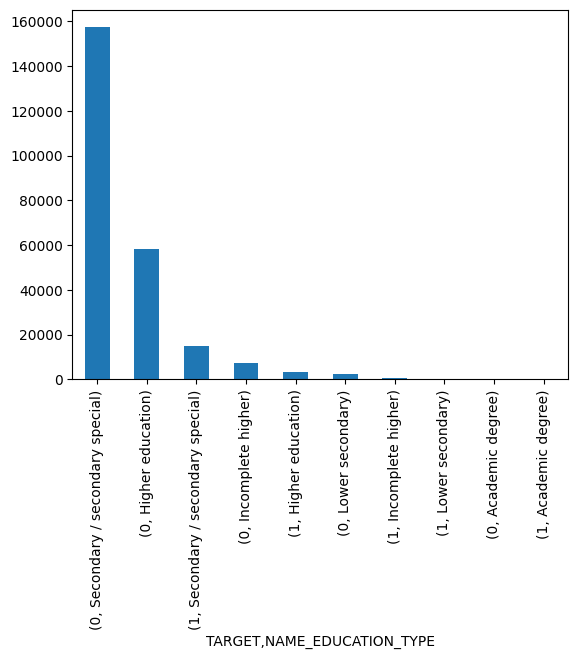

In [13]:
df[['TARGET','NAME_EDUCATION_TYPE']].value_counts().plot(kind='bar')

<Axes: xlabel='TARGET,NAME_INCOME_TYPE'>

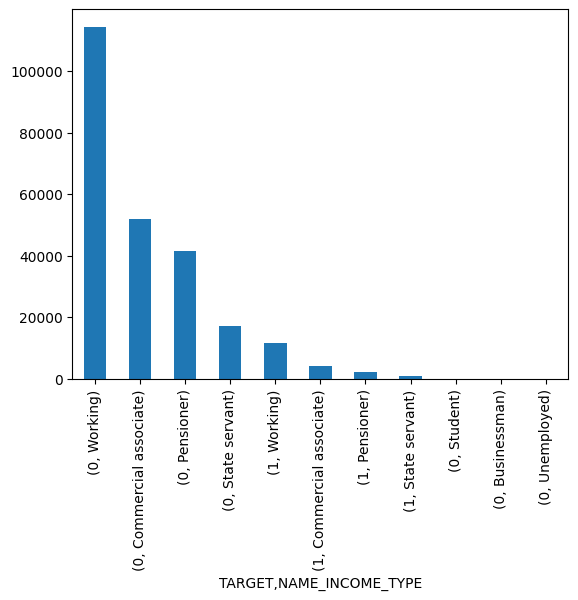

In [14]:
df[['TARGET','NAME_INCOME_TYPE']].value_counts().plot(kind='bar')

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='TARGET'>

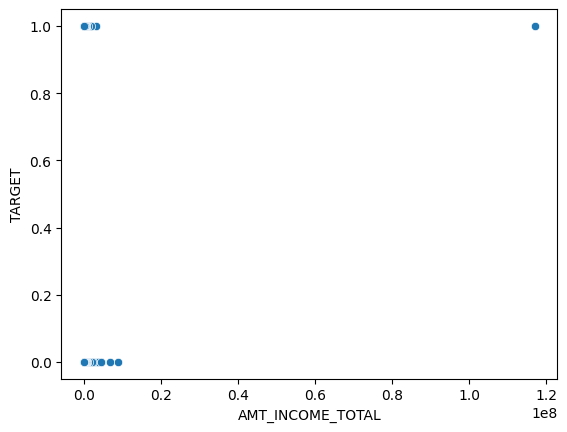

In [15]:
sns.scatterplot(x=df['AMT_INCOME_TOTAL'],y=df['TARGET'])

<Axes: xlabel='TARGET,WEEKDAY_APPR_PROCESS_START'>

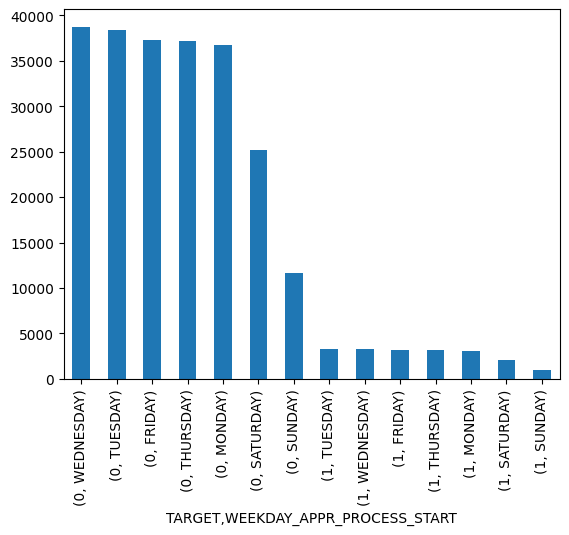

In [16]:
df[['TARGET','WEEKDAY_APPR_PROCESS_START']].value_counts().plot(kind='bar')

<Axes: xlabel='TARGET,HOUR_APPR_PROCESS_START'>

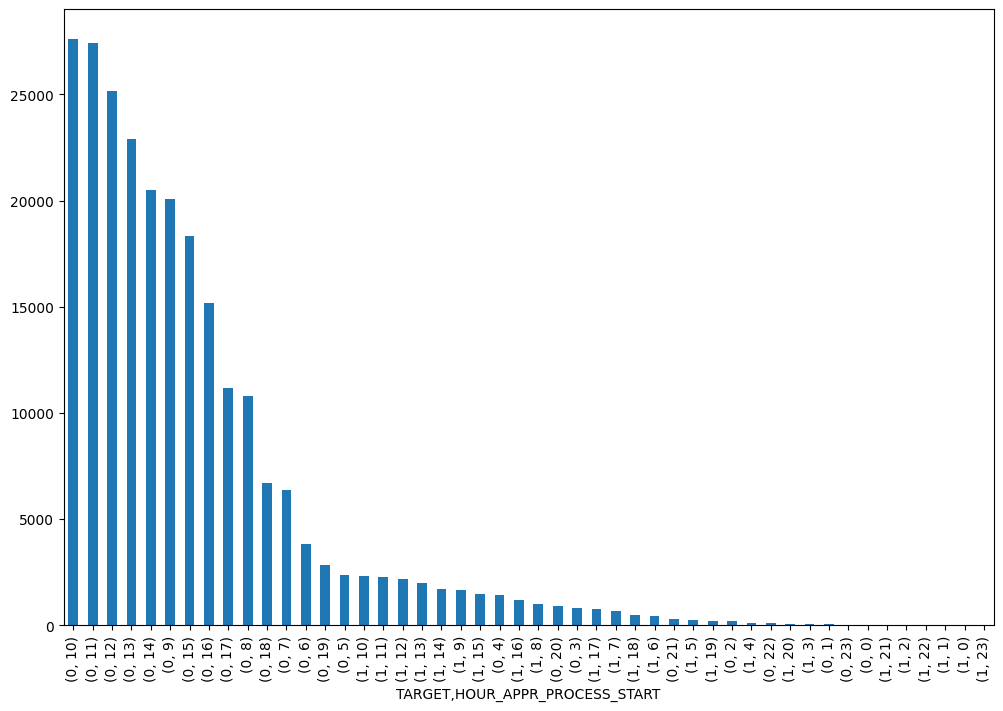

In [17]:
df[['TARGET','HOUR_APPR_PROCESS_START']].value_counts().plot(kind='bar',figsize=(12, 8))

<Axes: xlabel='TARGET,NAME_HOUSING_TYPE'>

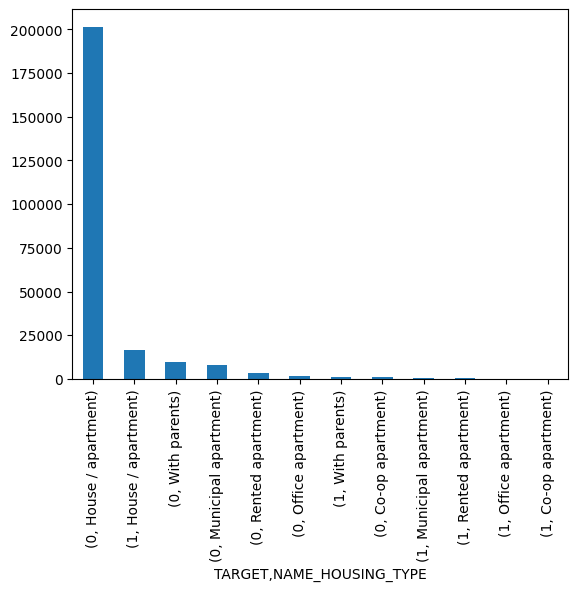

In [18]:
df[['TARGET','NAME_HOUSING_TYPE']].value_counts().plot(kind='bar')

<Axes: xlabel='TARGET,NAME_CONTRACT_TYPE'>

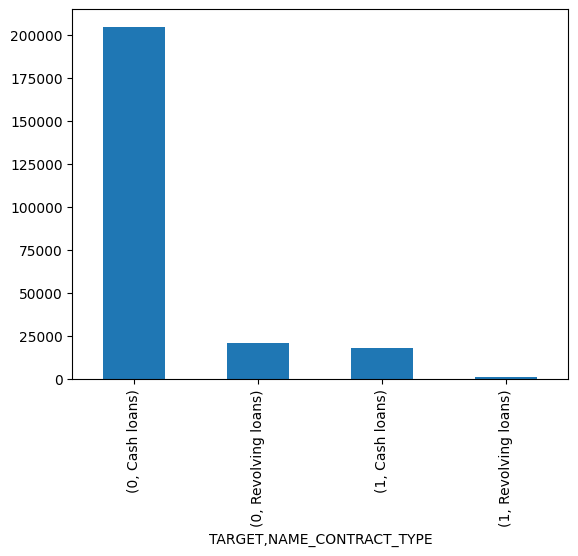

In [19]:
df[['TARGET','NAME_CONTRACT_TYPE']].value_counts().plot(kind='bar')

<Axes: xlabel='TARGET,CODE_GENDER'>

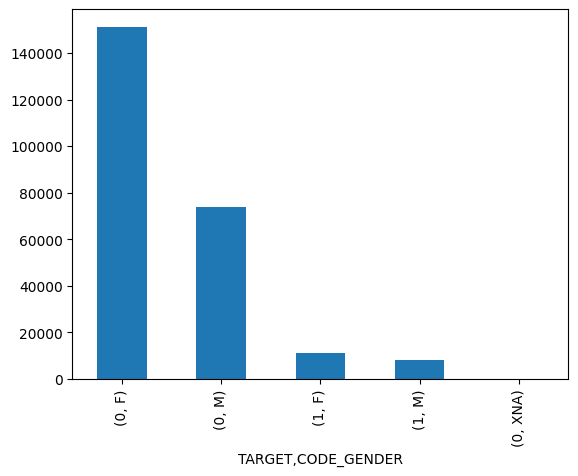

In [20]:
df[['TARGET','CODE_GENDER']].value_counts().plot(kind='bar')

<Axes: xlabel='TARGET,FLAG_OWN_CAR'>

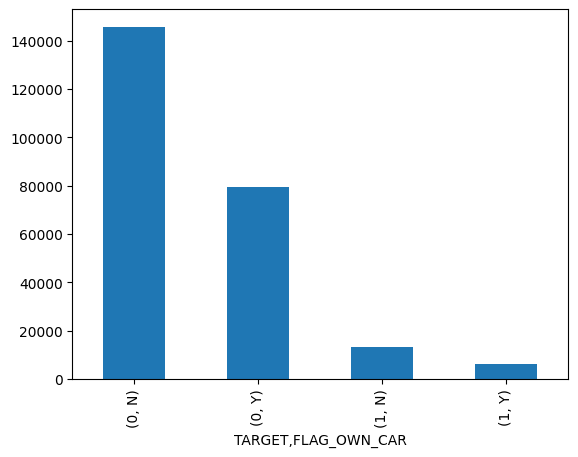

In [21]:
df[['TARGET','FLAG_OWN_CAR']].value_counts().plot(kind='bar')

<Axes: xlabel='TARGET,FLAG_OWN_REALTY'>

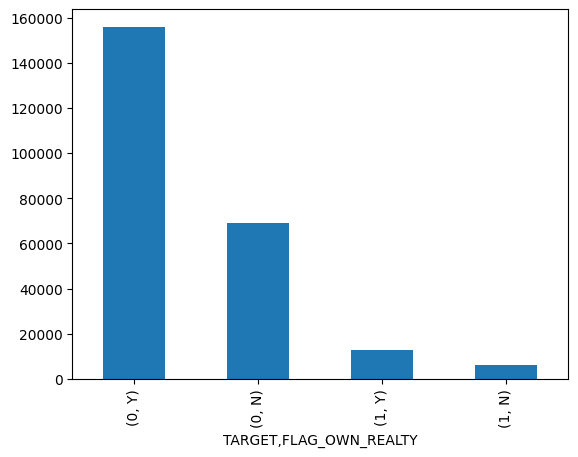

In [22]:
df[['TARGET','FLAG_OWN_REALTY']].value_counts().plot(kind='bar')

In [23]:
cat_col=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
         'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

In [24]:
le=LabelEncoder()

In [25]:
for i in cat_col:
  df[i]=le.fit_transform(df[i])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244280 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   244280 non-null  int64  
 1   TARGET                       244280 non-null  int64  
 2   NAME_CONTRACT_TYPE           244280 non-null  int64  
 3   CODE_GENDER                  244280 non-null  int64  
 4   FLAG_OWN_CAR                 244280 non-null  int64  
 5   FLAG_OWN_REALTY              244280 non-null  int64  
 6   CNT_CHILDREN                 244280 non-null  int64  
 7   AMT_INCOME_TOTAL             244280 non-null  float64
 8   AMT_CREDIT                   244280 non-null  float64
 9   AMT_ANNUITY                  244280 non-null  float64
 10  AMT_GOODS_PRICE              244280 non-null  float64
 11  NAME_TYPE_SUITE              244280 non-null  int64  
 12  NAME_INCOME_TYPE             244280 non-null  int64  
 13 

In [27]:
X=df.drop('TARGET',axis=1)
y=df['TARGET']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
mod=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),LinearSVC(),KNeighborsClassifier()]
for m in mod:
  print(m)
  model=m
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('Accuracy score:',accuracy_score(y_pred,y_test))
  print('Classification Report:',classification_report(y_pred,y_test))

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 0.9227935156377927
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.92      0.96     48788
           1       0.01      0.40      0.01        68

    accuracy                           0.92     48856
   macro avg       0.50      0.66      0.49     48856
weighted avg       1.00      0.92      0.96     48856

DecisionTreeClassifier()
Accuracy score: 0.8553708858686753
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.93      0.92     44308
           1       0.16      0.14      0.15      4548

    accuracy                           0.86     48856
   macro avg       0.54      0.53      0.54     48856
weighted avg       0.84      0.86      0.85     48856

RandomForestClassifier()
Accuracy score: 0.9231210086785656
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.92      0.96     48842
           1 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy score: 0.9230391354183723
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.92      0.96     48854
           1       0.00      0.00      0.00         2

    accuracy                           0.92     48856
   macro avg       0.50      0.46      0.48     48856
weighted avg       1.00      0.92      0.96     48856

KNeighborsClassifier()
Accuracy score: 0.9185361061077452
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.92      0.96     48444
           1       0.03      0.23      0.05       412

    accuracy                           0.92     48856
   macro avg       0.51      0.58      0.50     48856
weighted avg       0.98      0.92      0.95     48856

